# Principal Component Analysis with Cancer Data

In [275]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter("ignore")

In [239]:
bcDF=pd.read_csv('breast-cancer-wisconsin-data.csv')
bcDF.head()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [240]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [241]:
bcDF.dtypes

ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [242]:
bcDF.shape

(699, 11)

# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [243]:
# We could see "?" values in column, this should be removed from data set

print(bcDF.info(),'\n\n')

print(bcDF.isnull().values.any(),'\n\n')

print(bcDF.all(),'\n\n')

print(bcDF.empty)


# Check for missing value in any other column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB
None 


False 


ID                             True
ClumpThickness                 True
Cell Size                      True
Cell Shape                     True
Marginal Adhesion              True
Single Epithelial Cell Size    True
Bare Nuclei                    True
Normal Nucleoli        

In [244]:
print(bcDF[bcDF.isin(["?"]).any(axis=1)].shape[0])

16


In [245]:
bcDF.loc[bcDF["Bare Nuclei"]=="?","Bare Nuclei"]="NaN"


In [246]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values="NaN", strategy="mean", axis =0)
imputer = imputer.fit(bcDF.iloc[:, 6:7])
bcDF.iloc[:, 6:7]=imputer.transform(bcDF.iloc[:, 6:7])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [247]:
bcDF.drop_duplicates(inplace=True)

In [248]:
bcDF.shape

(691, 11)

In [249]:
bcDF=bcDF.drop("ID",axis=1)

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [250]:
bcDF_corr=bcDF.corr()
bcDF_corr

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ClumpThickness,1.000000,0.643340,0.653752,0.487949,0.517448,0.588035,0.561076,0.535712,0.350354,0.716938
Cell Size,0.643340,1.000000,0.905420,0.713117,0.747111,0.684906,0.759525,0.727239,0.460064,0.817720
Cell Shape,0.653752,0.905420,1.000000,0.690989,0.714393,0.706537,0.738455,0.724693,0.440592,0.817693
Marginal Adhesion,0.487949,0.713117,0.690989,1.000000,0.608477,0.670708,0.669813,0.602453,0.417167,0.701371
Single Epithelial Cell Size,0.517448,0.747111,0.714393,0.608477,1.000000,0.578204,0.620518,0.634058,0.482644,0.681233
Bare Nuclei,0.588035,0.684906,0.706537,0.670708,0.578204,1.000000,0.674385,0.580961,0.339299,0.813809
Normal Nucleoli,0.561076,0.759525,0.738455,0.669813,0.620518,0.674385,1.000000,0.669059,0.343821,0.756618
Bland Chromatin,0.535712,0.727239,0.724693,0.602453,0.634058,0.580961,0.669059,1.000000,0.427644,0.715540
Mitoses,0.350354,0.460064,0.440592,0.417167,0.482644,0.339299,0.343821,0.427644,1.000000,0.424111
Class,0.716938,0.817720,0.817693,0.701371,0.681233,0.813809,0.756618,0.715540,0.424111,1.000000


In [251]:
for col in bcDF.columns:
    for col1 in bcDF.columns:
        if((bcDF_corr[col][col1]>0.5 or bcDF_corr[col][col1]<-0.4) and col!=col1):
            print(col,'-',col1,"=",bcDF_corr[col][col1],'\n')
            
        


ClumpThickness - Cell Size = 0.6433395836390849 

ClumpThickness - Cell Shape = 0.6537521438469476 

ClumpThickness - Single Epithelial Cell Size = 0.5174477844428819 

ClumpThickness - Bare Nuclei = 0.5880346026843267 

ClumpThickness - Normal Nucleoli = 0.5610763652580278 

ClumpThickness - Bland Chromatin = 0.5357117978950268 

ClumpThickness - Class = 0.716938463387643 

Cell Size - ClumpThickness = 0.6433395836390849 

Cell Size - Cell Shape = 0.9054195250361602 

Cell Size - Marginal Adhesion = 0.7131170066181407 

Cell Size - Single Epithelial Cell Size = 0.747111195924669 

Cell Size - Bare Nuclei = 0.6849057677129963 

Cell Size - Normal Nucleoli = 0.7595252400173893 

Cell Size - Bland Chromatin = 0.7272393608711972 

Cell Size - Class = 0.8177198104497585 

Cell Shape - ClumpThickness = 0.6537521438469476 

Cell Shape - Cell Size = 0.9054195250361602 

Cell Shape - Marginal Adhesion = 0.6909890378835563 

Cell Shape - Single Epithelial Cell Size = 0.7143934339413943 

Cell S

In [252]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

In [253]:
#Let us check for pair plots

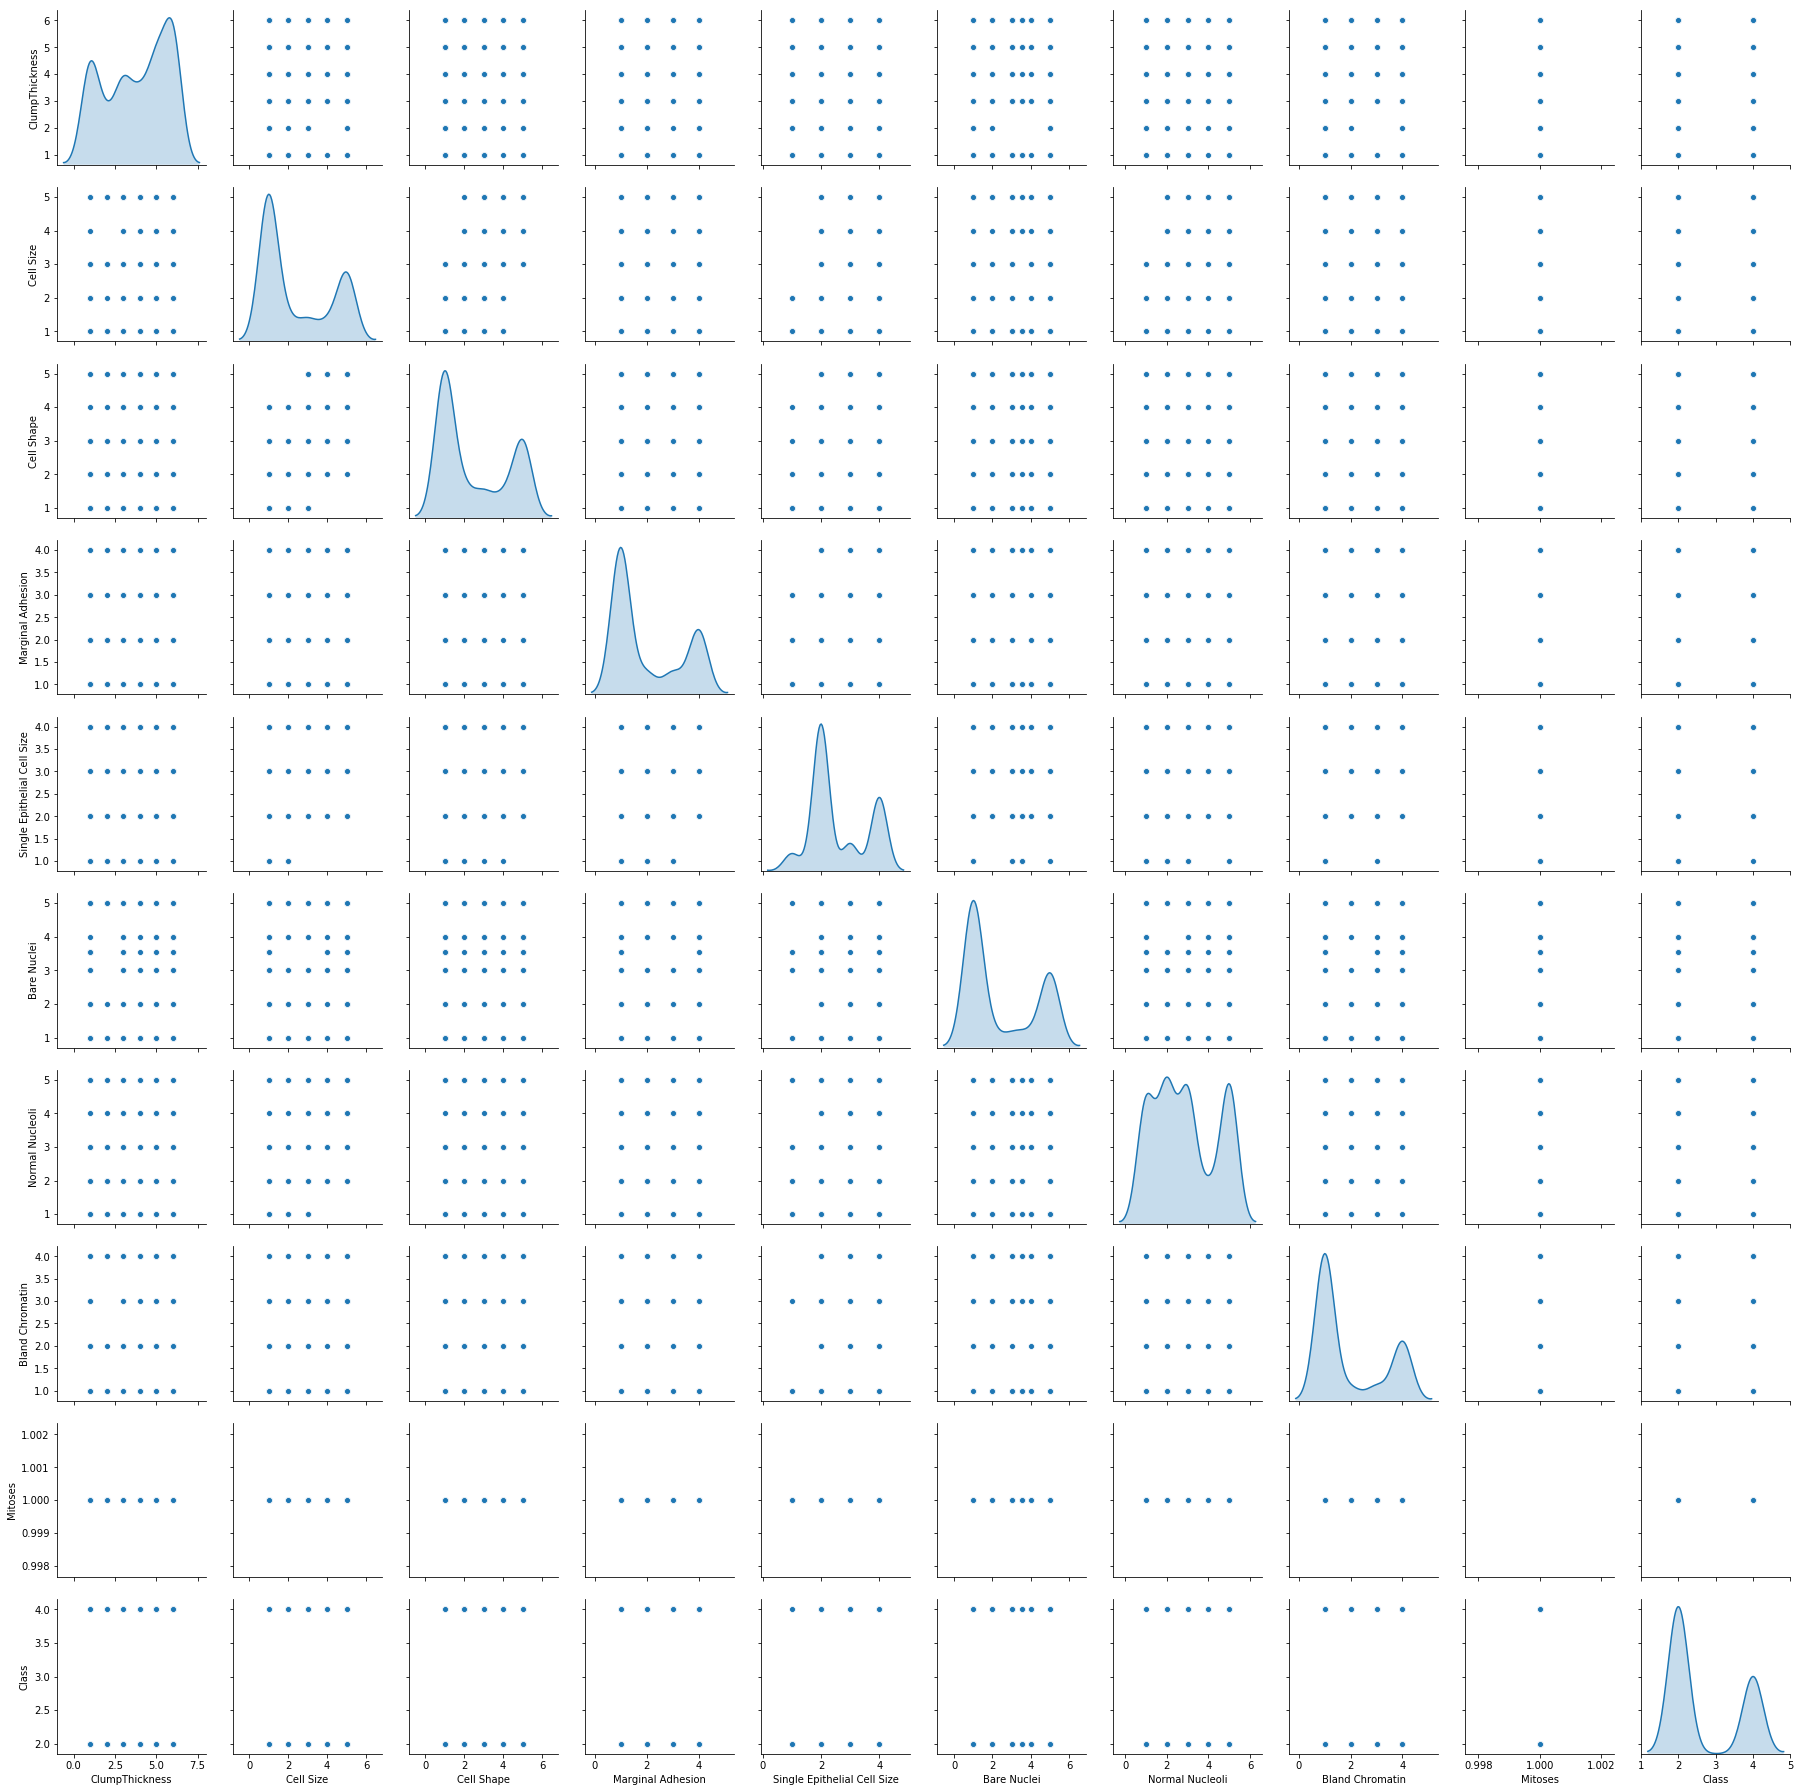

In [344]:
 sns.pairplot(data=bcDF,diag_kind='kde')

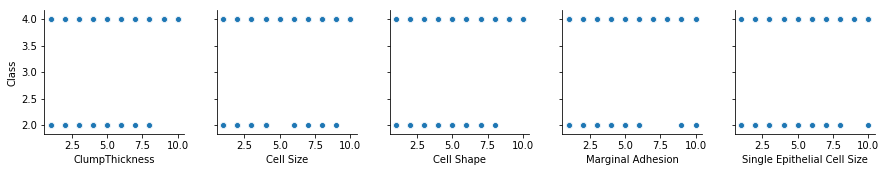

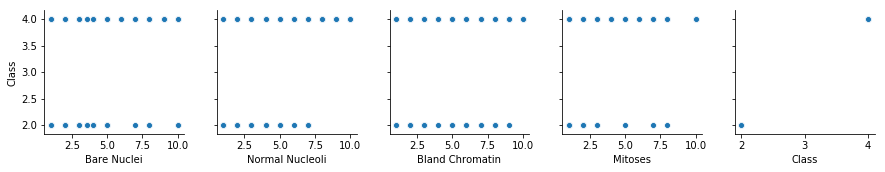

In [255]:
for i in range(0, len(bcDF.columns), 5):
    sns.pairplot(data=bcDF,
                x_vars=bcDF.columns[i:i+5],
                y_vars=['Class'])

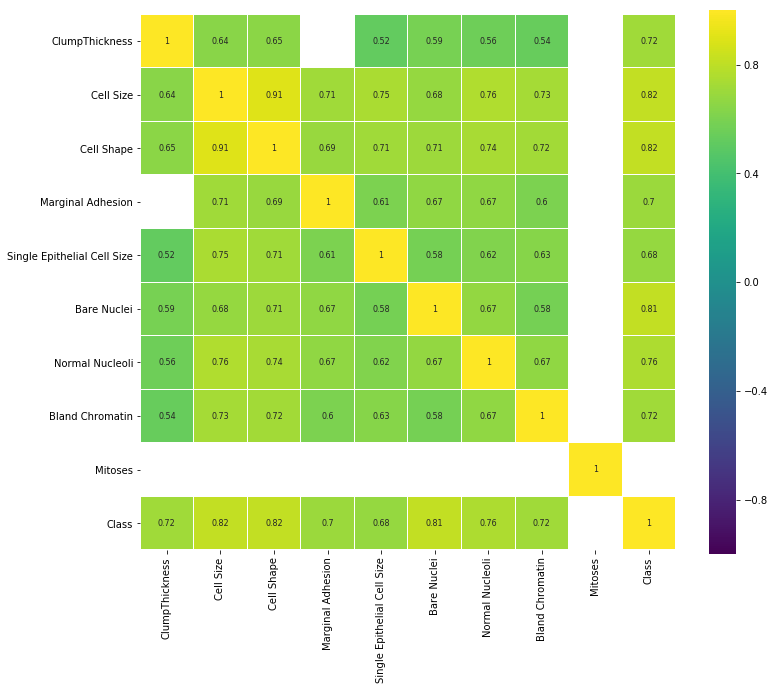

In [256]:
corr = bcDF.corr() 
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [257]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

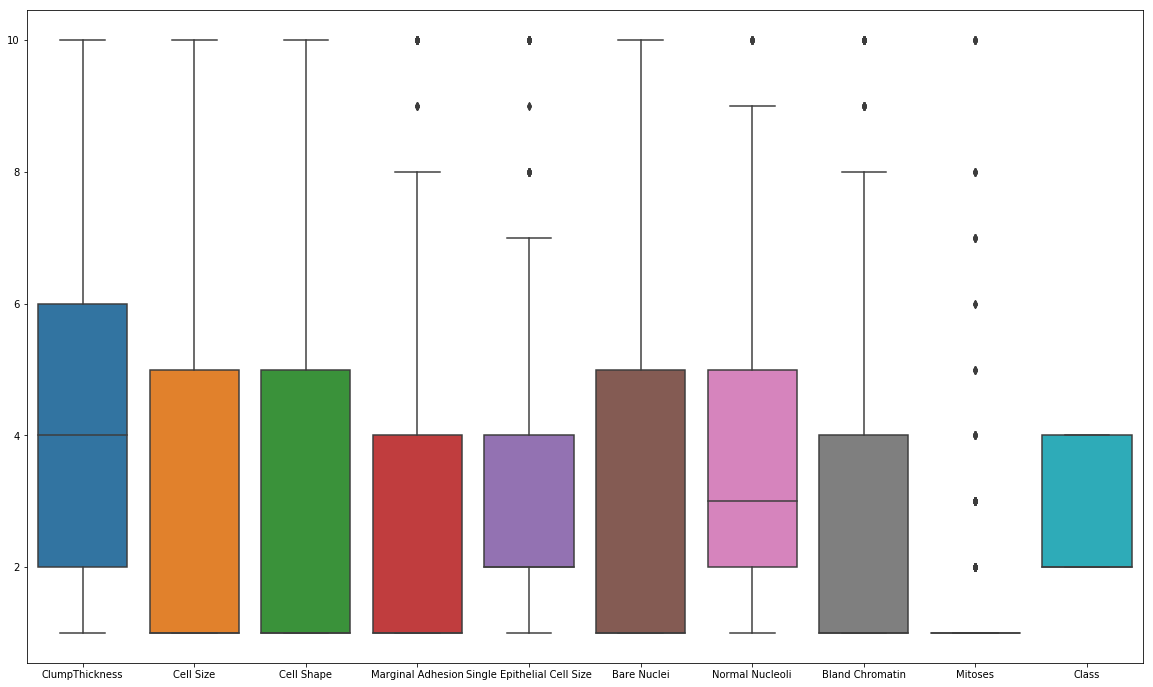

In [258]:
plt.figure(figsize=(20,12))
sns.boxplot(data=bcDF)

In [265]:
values = bcDF.quantile([0.75])

for col in bcDF.columns:
    value=values[col].values[0]
    bcDF[col]=np.where(bcDF[col]>value,value,bcDF[col])


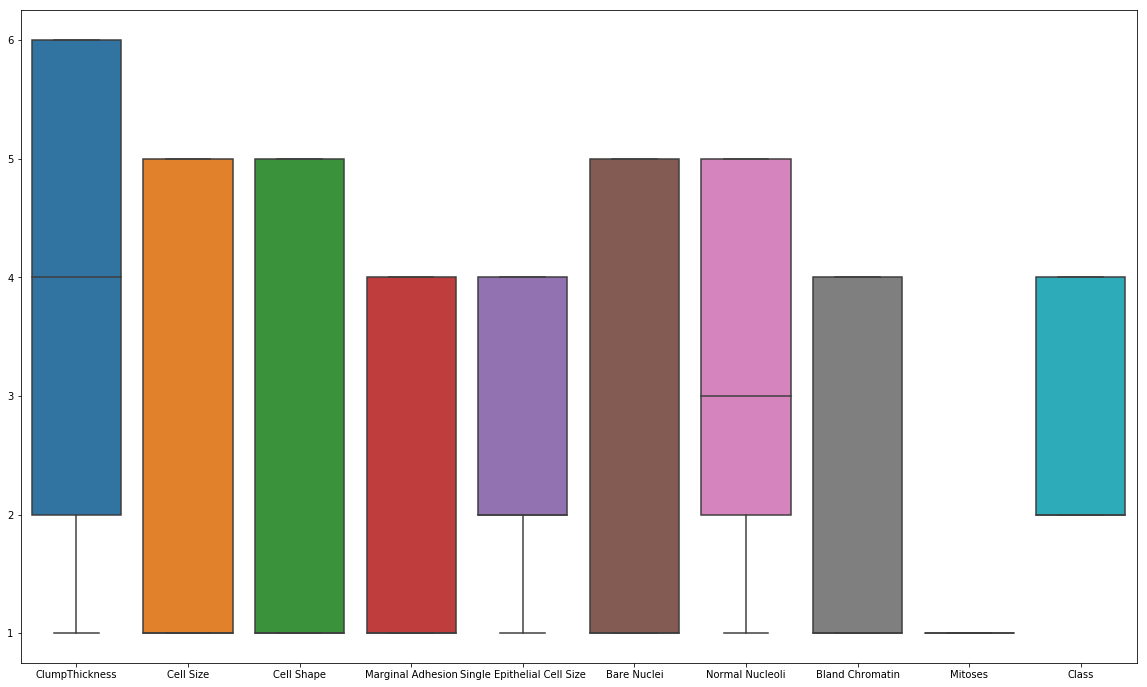

In [266]:
plt.figure(figsize=(20,12))
sns.boxplot(data=bcDF)

In [262]:
# We could see most of the outliers are now removed.

# Q6 Create a covariance matrix for identifying Principal components

In [267]:
# PCA
# Step 1 - Create covariance matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [268]:
X = bcDF

X_std = StandardScaler().fit_transform(X)

In [272]:
cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n', cov_matrix)

Covariance Matrix 
 [[1.00144928 0.63051831 0.63240835 0.53027549 0.55229269 0.53163511
  0.52371457 0.54401544 0.         0.63444259]
 [0.63051831 1.00144928 0.91073739 0.76751046 0.80695286 0.77800193
  0.76148641 0.77856017 0.         0.8805565 ]
 [0.63240835 0.91073739 1.00144928 0.73196674 0.77523615 0.76867567
  0.72652822 0.75170206 0.         0.86210893]
 [0.53027549 0.76751046 0.73196674 1.00144928 0.69571071 0.685921
  0.65072172 0.65353965 0.         0.74034695]
 [0.55229269 0.80695286 0.77523615 0.69571071 1.00144928 0.68845098
  0.67600388 0.72377865 0.         0.77214514]
 [0.53163511 0.77800193 0.76867567 0.685921   0.68845098 1.00144928
  0.68750172 0.67721039 0.         0.81813859]
 [0.52371457 0.76148641 0.72652822 0.65072172 0.67600388 0.68750172
  1.00144928 0.68663434 0.         0.77153757]
 [0.54401544 0.77856017 0.75170206 0.65353965 0.72377865 0.67721039
  0.68663434 1.00144928 0.         0.76731789]
 [0.         0.         0.         0.         0.         0.
  

<Figure size 3600x1800 with 0 Axes>

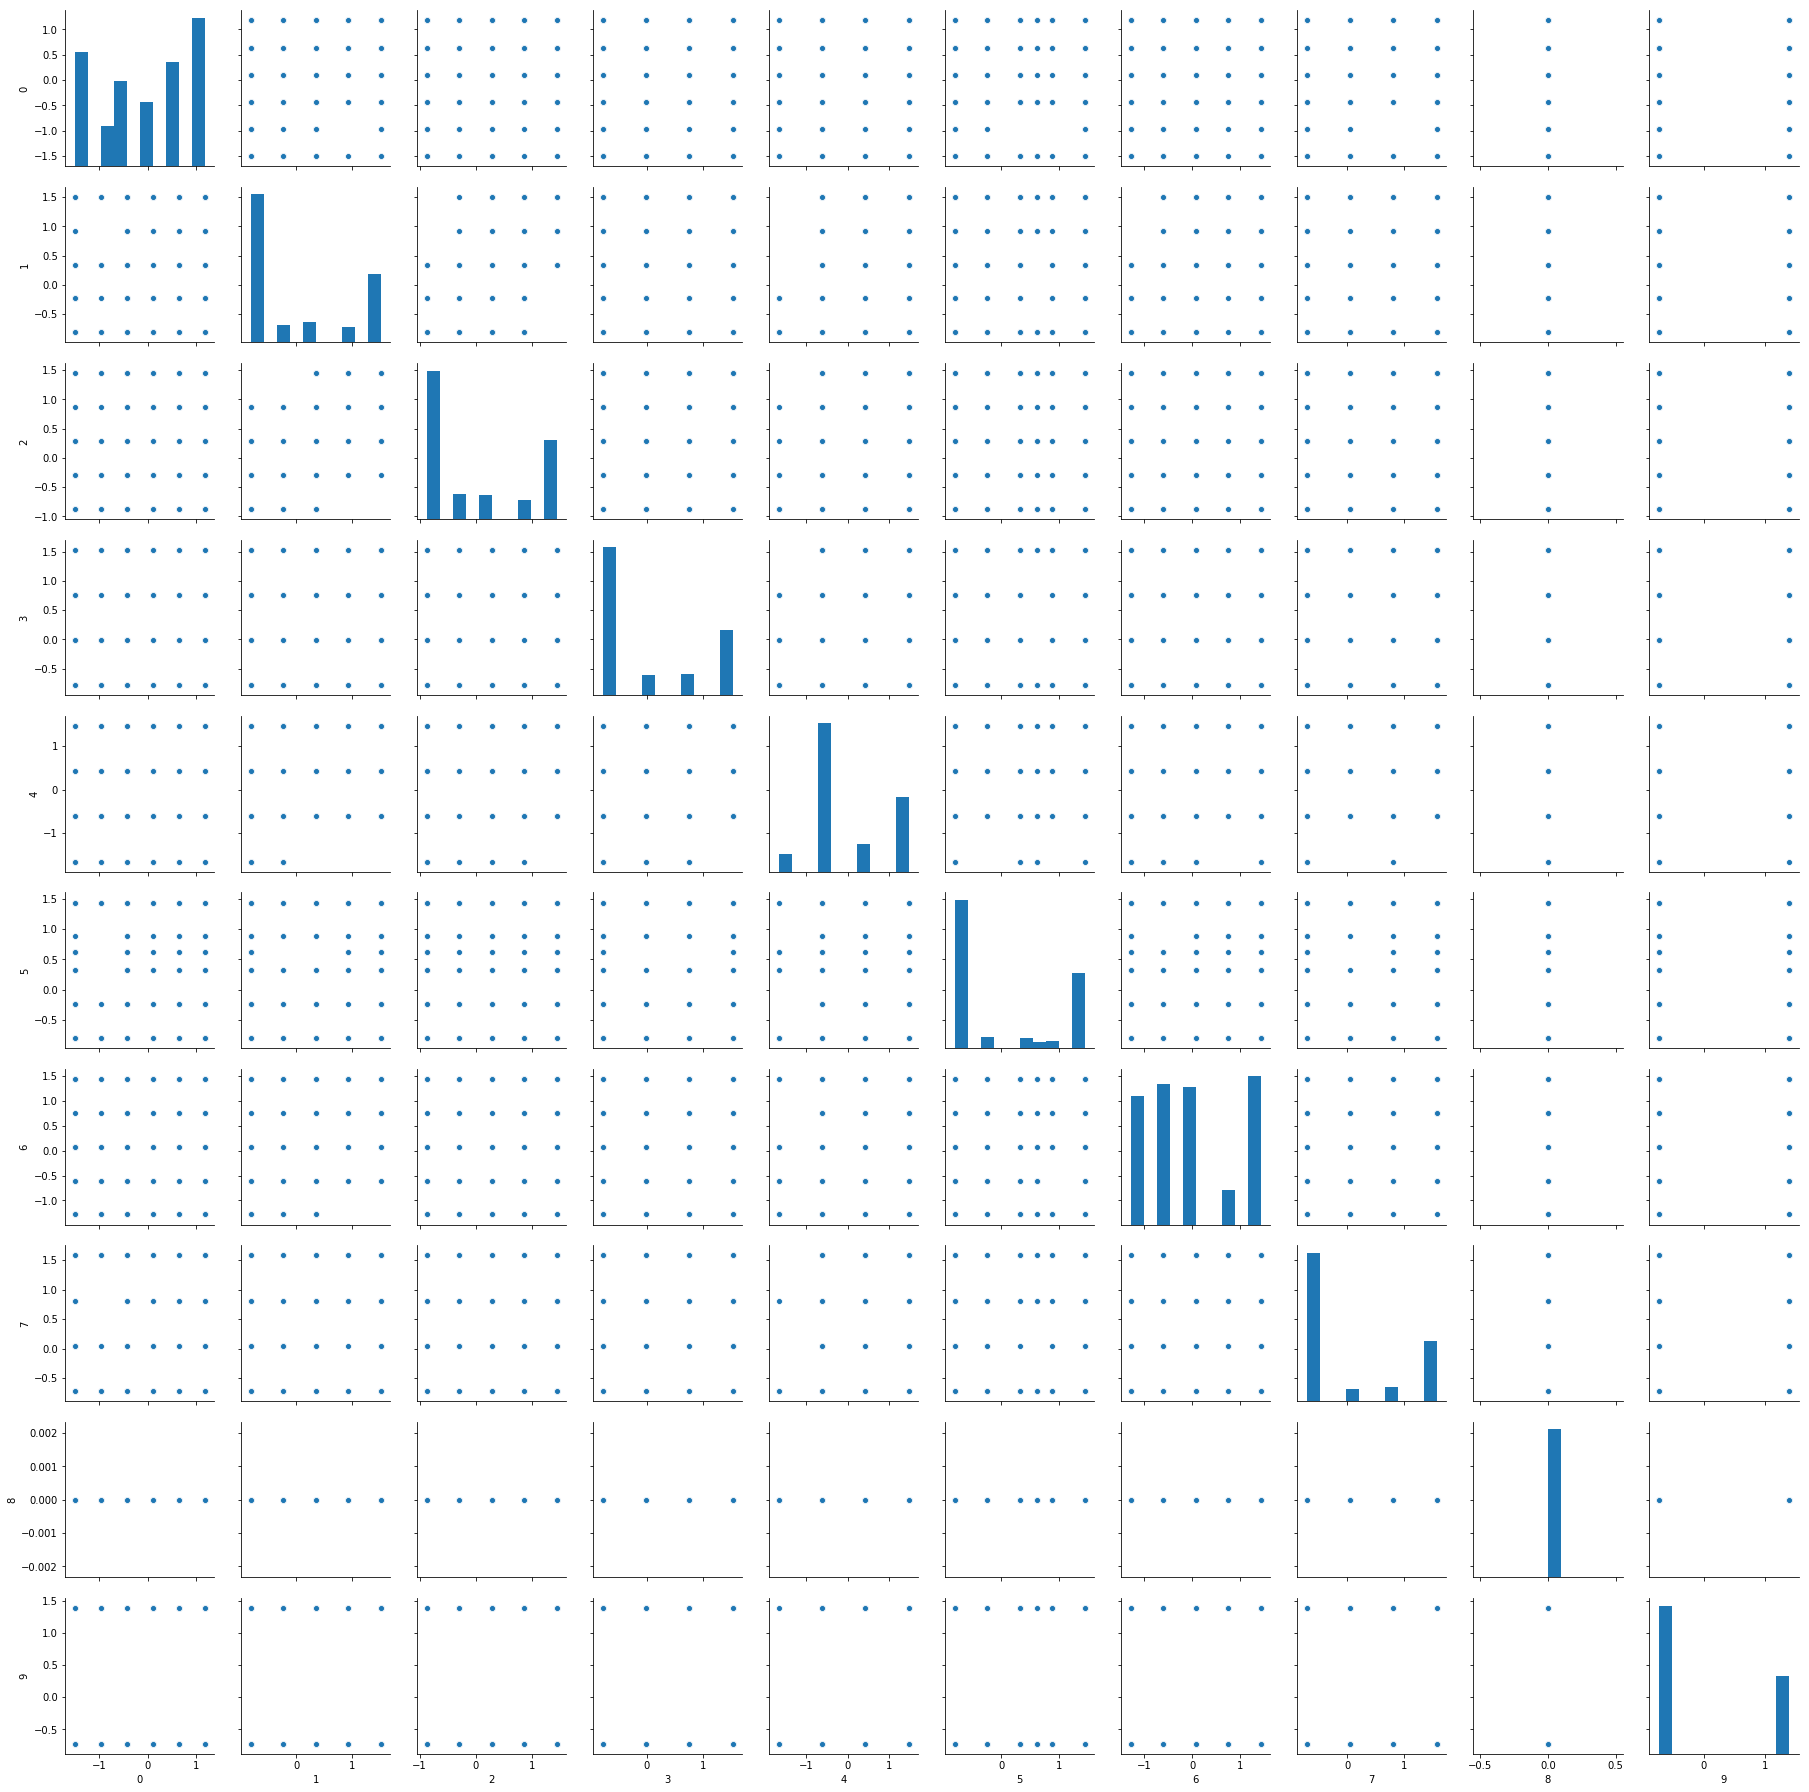

In [279]:
plt.figure(figsize=(50,25))
X_std_df = pd.DataFrame(X_std)
sns.pairplot(data=X_std_df)


# Q7 Identify eigen values and eigen vector

In [281]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

In [264]:
# Step 2- Get eigen values and eigen vector

In [282]:
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[ 0.27291778 -0.94483428 -0.01490303  0.046095    0.14831139  0.04026256
  -0.06316615  0.05188156  0.01257843  0.        ]
 [ 0.36485853  0.04276779 -0.80318567  0.11559627 -0.41915476 -0.14026515
   0.08089709 -0.06067452 -0.03144332  0.        ]
 [ 0.35713065 -0.00380654  0.57320054  0.35423665 -0.58985854 -0.16206915
   0.20609913 -0.02763025 -0.03099928  0.        ]
 [ 0.32079432  0.13203556  0.06100574 -0.00403717  0.04504264  0.28536203
  -0.47734609 -0.01108207 -0.75131697  0.        ]
 [ 0.33315308  0.11055117  0.06375043 -0.00623566  0.47108486 -0.61558633
   0.04425109 -0.51609709 -0.05918288  0.        ]
 [ 0.33056211  0.17479712 -0.04109584  0.25304736  0.44021439  0.15493793
   0.54566833  0.51818446 -0.10192792  0.        ]
 [ 0.32238394  0.17633435  0.04187878  0.12150057  0.08778513 -0.16083738
  -0.62478138  0.40990627  0.50646693  0.        ]
 [ 0.32747843  0.11372365  0.02644115  0.05428456  0.09103284  0.66479859
   0.04243843 -0.51375268  0.4002

# Q8 Find variance and cumulative variance by each eigen vector

In [283]:
eigen_pairs = [(np.abs(eig_vals[i]), eig_vecs[ :, i]) for i in range(len(eig_vals))]

In [284]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 74.60908961  80.73146086  84.76555049  88.63534435  92.12396467
  95.13584768  97.65218041  99.05970084 100.         100.        ]


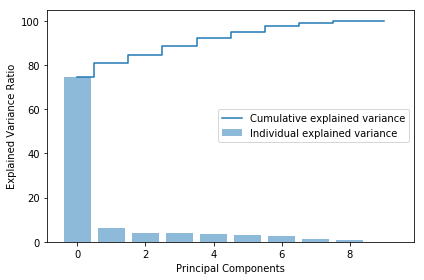

In [288]:
plt.figure(figsize=(6 , 4))
plt.bar(range(10), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(10), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [345]:
# First 6 principal components explain 95% of the variance in the data. 

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [289]:
X_centered = bcDF - bcDF.mean(axis=0)

In [290]:
pca = PCA(n_components=6)
pca.fit(X_centered)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [291]:
X_pca = pca.transform(X_centered)

In [292]:
X_pca.shape

(691, 6)

In [303]:
X_pca

array([[-2.15945865, -2.04995358, -0.07467844,  1.23432065,  0.07950954,
         0.17877126],
       [ 3.50945658,  0.22540597,  1.25202248, -1.10985318,  1.09686956,
         0.26362735],
       [-2.47851056,  0.07057059,  0.53818042,  1.14478565, -0.04031913,
         0.16993603],
       ...,
       [ 4.92440093,  0.38503953, -1.82082622,  0.10031589, -0.58073204,
        -0.03858081],
       [ 5.03274119,  1.62888699, -1.04569115, -0.0169615 ,  0.21575948,
        -0.10870836],
       [ 5.64528108,  1.97410016, -0.31995612, -0.03266846,  0.15650005,
        -0.276707  ]])

In [308]:
pca.components_

array([[ 0.361265  ,  0.4247289 ,  0.41826543,  0.27518897,  0.2090618 ,
         0.40347809,  0.31622127,  0.28232937, -0.        ,  0.22849694],
       [-0.91989417,  0.11567232,  0.08530662,  0.10769477,  0.06447732,
         0.28073585,  0.16136239,  0.0974404 ,  0.        ,  0.05510775],
       [ 0.1203344 , -0.24184619, -0.19612303, -0.08585082, -0.12779263,
         0.85352766, -0.26142292, -0.26036434,  0.        ,  0.01494977],
       [ 0.07946916, -0.25377569, -0.38247175, -0.19232185, -0.08511029,
         0.06940333,  0.85600483,  0.03414128, -0.        ,  0.00630456],
       [ 0.02432625, -0.10275493, -0.27934911,  0.90391071,  0.01191676,
        -0.07117619,  0.06428193, -0.28718879,  0.        , -0.04406275],
       [-0.02631398,  0.21419712,  0.38952053, -0.14151377, -0.10653544,
        -0.0614632 ,  0.23603977, -0.84283185,  0.        ,  0.02160909]])

# Q10 Find correlation between components and features

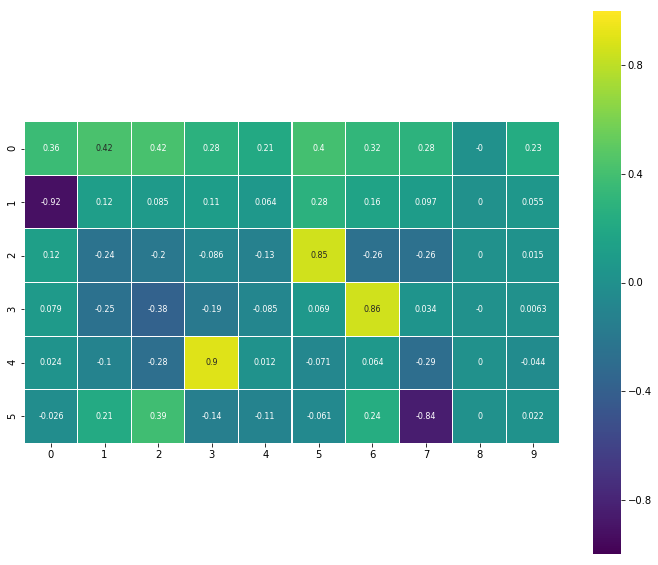

In [314]:
pcaCC=pd.DataFrame(pca.components_)

pcaCCcorr = pcaCC # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))

sns.heatmap(pcaCCcorr, 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q11 Read the dataset(jokes.csv)


In [321]:
jDF=pd.read_csv('jokes.csv')
print(jDF.shape)
jDF.head()


(24983, 101)


,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q12 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [329]:
ratingsDF=jDF.iloc[0:200,1:101]
ratingsDF.shape

(200, 100)

# Q13 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [332]:
ratingsDF.replace(99.00,0,inplace=True)

### Popularity based recommendation system

# Q14  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [340]:
ratingsMean= ratingsDF.mean().sort_values(ascending =False)

In [343]:
ratingsMean[:10]

Joke50    4.05540
Joke36    3.61150
Joke53    3.57150
Joke35    3.22315
Joke29    3.18995
Joke27    3.05240
Joke62    2.86185
Joke49    2.85000
Joke32    2.77955
Joke31    2.65710
dtype: float64